In [ ]:
import numpy as np
import scipy.special as sp

In [ ]:
def CarToSph(xyz):
    if len(xyz.shape) == 2:
        x, y, z = xyz[:,0], xyz[:,1], xyz[:,2]
    elif len(xyz.shape) == 1:
        x, y, z = xyz[0], xyz[1], xyz[2]
    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = np.arccos(z/r)
    phi = np.arctan2(y, x)
    return r, theta, phi


def SphToCar(r, theta, phi):
    x = r * np.cos(phi) * np.sin(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(theta)
    return x, y, z


In [ ]:
def XYZToL(idx, level):
    n = 2 ** level
    return idx[2] * n * n +idx[1] * n + idx[0]


def LToXYZ(l, level):
    n = 2 ** level
    z = l // (n * n)
    y = (l-z * n * n)//n
    x = (l-z * n * n) % n
    return np.array([x, y, z])


In [ ]:
#Code for the beginning of the model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate
import astropy
import astropy.constants as c


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter

In [ ]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def sub(self, other):
        return Vector(self.x - other.x, self.y - other.y)

    def div(self, c):
        return Vector(self.x / c, self.y / c)

    def mult(self, c):
        return Vector(self.x / c, self.y / c)

    def mag(self):
        return math.sqrt(self.x * self.x + self.y * self.y)

    def norm(self):
        if self.x == 0 and self.y == 0:
            return Vector(0,0)
        else:
            return self.div(self.mag())

    def dot(self, other):
        return self.x * other.x + self.y * other.y

    def anglebet(self, other):
        return math.acos(dot(self, other) / (mag(x) + mag(y)))

    def display(self):
        print("[", self.x, " " , self.y , "]");

    def toarray(self):
        return np.array([self.x, self.y])

In [ ]:
#This is just defining our class, and methods of the objects
class Asteroid:
    def __init__(self, pos, velo, mass, r):
        self.pos = pos
        self.velo = velo
        self.mass = mass
        self.r = r

    def distance(self, other):
        temp = (self.pos.x - other.pos.x) **2 + (self.pos.y - other.pos.y) **2
        return abs(math.sqrt(temp))  #This is just finding the distance btw the objects

    def calc_grav_force(self,mass,r):
        return (c.G * (mass*(2e21)) / (r) ** 2) #This is the gravitational force btw the two objects. 2e21 is jsut the mass of the plaent

    def KN(self,mass,velo):
        return 0.5 * mass * velo ** 2

dimorphos = Asteroid(Vector(0,-4), Vector(20,0), 4.52e9, 278.87)
didymos = Asteroid(Vector(0,0), Vector(0,0), 5.24e11, 1279.5)

In [ ]:
class spacecraft:
    def __init__(self, Pos_1, Velo_1, Mass_1, R):
        self.Velo_1 = Velo_1  #Need to figure out what type of velocity
        self.Mass_1 = Mass_1
        self.Pos_1 = Pos_1
        self.R = R

    def KN (self,Mass_1,Velo_1):
        return ((1/2) * (Mass_1) * Velo_1.mag() **2)

spacecraft_1 = spacecraft(Vector(10,-4), Vector(0,0),610,1)


In [ ]:
#Animating a binary system

In [ ]:
G = 1 #gravitational constant

# Define masses (in terms of solar mass)
m1 = 4.52e0   # (Smaller)
m2 = 5.24e2  # (Bigger)

# Define initial position vectors
r1 = np.array([2,0])
r2 = np.array([0,0])

# Define initial velocities
v1 = np.array([0,1])
v2 = np.array([0,0])

#Initialize new instances of the Star Class
Didy = (m1,r1,v1)
Dimor = (m2,r2,v2)

In [ ]:
def TwoBodyEquations(w, t, m1, m2): # w is an array containing positions and velocities

    r1 = w[:2]
    r2 = w[2:4]
    v1 = w[4:6]
    v2 = w[6:8]


    r12 = np.linalg.norm(r2-r1)

    dv1bydt = m2*(r2-r1)/r12 **3  # derivative of velocity
    dv2bydt = m1*(r1-r2)/r12 **3

    dr1bydt = v1 # derivative of position
    dr2bydt = v2

    r_derivs = np.concatenate((dr1bydt,dr2bydt)) # joining arrays together
    v_derivs = np.concatenate((dv1bydt,dv2bydt))
    derivs = np.concatenate((r_derivs,v_derivs))

    return derivs

In [ ]:
# Package initial parameters into one array (just easier to work with this way)
init_params = np.array([r1, r2, v1, v2], dtype=np.float64)
init_params = init_params.flatten()
time_span = np.linspace(0, 5, 500)  # run for t=5 (500 points)

# Run the ODE solver
two_body_sol = scipy.integrate.odeint(TwoBodyEquations, init_params, time_span, args=(m1,m2))

In [ ]:
r1_sol = two_body_sol[:,:2]
r2_sol = two_body_sol[:,2:4]

In [ ]:
# Initilize writer
metadata = dict(title='My first animation', artist='Matplotlib')
writer = FFMpegWriter(fps=50, metadata=metadata, bitrate=200000) # change fps for different frame rates
fig = plt.figure(dpi=200)

<Figure size 1200x800 with 0 Axes>

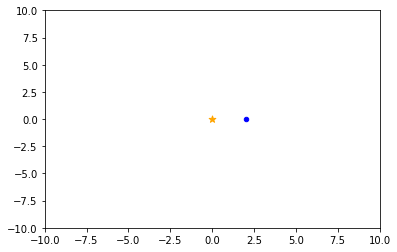

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# SAVE AS MP4 (will be saved in whatever directory you are working in) ##infinite loop fix
fig, ax = plt.subplots()

with writer.saving(fig, "orbit.mp4", dpi=200):
    for i in range(len(time_span)):

        ax.clear()

        ax.plot(r1_sol[:i,0],r1_sol[:i,1], color="blue", alpha=0.5)
        ax.scatter(r1_sol[i,0],r1_sol[i,1], color="blue", marker="o",s=20, zorder=5) # planet

        ax.scatter(0, 0, color="orange", marker="*",s=50, zorder=5) # star

        ax.set_xlim(-10, 10)
        ax.set_ylim(-10, 10)

        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

## RK4 Kernel
A forth-order high accuracy ODE solver.

Structure of ``` pair ```:

```
array([[0, 1],
    [0, 2],
    [3, 4]])
```
First column for the small mass \\
Second column for the big




In [ ]:
def NBodyDerivs_slow(w, t, m, pair):
  n = w.shape[1]
  r = w[:2,:]
  v = w[2:,:]
  r_derivs = v
  v_derivs = np.zeros(shape=r_derivs.shape)
  for i in range(pair.shape[0]):
    rr = np.linalg.norm(r[:,pair[i,0]] - r[:,pair[i,1]], axis=0)
    v_derivs[:,pair[i,0]] += (m[pair[i,1]]*(r[:,pair[i,1]]-r[:,pair[i,0]])/rr**3)
  return np.concatenate((r_derivs,v_derivs))

In [ ]:
def NBodyDerivs(w, t, m, pair): # Faster when the number of particle >= 4
  n = w.shape[1]
  r = w[:2,:]
  v = w[2:,:]
  rr = np.linalg.norm(r[:,pair[:,0]] - r[:,pair[:,1]], axis=0)
  SUM = np.zeros(shape=(pair.shape[0], n))
  SUM[np.arange(pair.shape[0]), pair[:,0]] = 1
  v_derivs = (m[pair[:,1]]*(r[:,pair[:,1]]- r[:,pair[:,0]])/rr**3) @ SUM
  return np.concatenate((v,v_derivs))

In [ ]:
def f(t,y):
  return NBodyDerivs(y, t, m, pair)

In [ ]:
r1 = [0,0.5]
r2 = [0,0]
v1 = [-1,0]
v2 = [1,0]
m = np.array([1,1])
pair = np.array([[0,1],[1,0]])
init_condition = np.vstack((np.stack((r1,r2)).T, np.stack((v1,v2)).T))

In [ ]:
def solve_orbit(init, start_t, total_t, dt):
  t, y = start_t, init
  h = dt

  ans = np.zeros(shape=(4,2,int(total_t/dt)//100+1), dtype=np.float64)

  step = 0

  while t<start_t+total_t:
    k1 = f(t, y)
    k2 = f(t+0.5*h, y+0.5*h*k1)
    k3 = f(t+0.5*h, y+0.5*h*k2)
    k4 = f(t+h, y+h*k3)
    y += h/6.*(k1+2.*k2+2.*k3+k4)
    t += h
    if step % 100 == 0:
      ans[:,:,step//100] = y.copy()
    step += 1
  return ans[:,:,:-1]

def solve_orbit_with_inject(init, start_t, total_t, dt, rotate, lost_rate):
  t, y = start_t, init
  h = dt

  ans = np.zeros(shape=(4,2,int(total_t/dt)//100+1), dtype=np.float64)

  step = 0

  while t<start_t+total_t:
    k1 = f(t, y)
    k2 = f(t+0.5*h, y+0.5*h*k1)
    k3 = f(t+0.5*h, y+0.5*h*k2)
    k4 = f(t+h, y+h*k3)
    y += h/6.*(k1+2.*k2+2.*k3+k4)
    y[2,0] += np.cos(2*np.pi*t/rotate)*lost_rate
    y[3,0] += np.sin(2*np.pi*t/rotate)*lost_rate
    t += h
    if step % 100 == 0:
      ans[:,:,step//100] = y.copy()
    step += 1
  return ans[:,:,:-1]


In [ ]:
r1 = [0,30.]
r2 = [0,0]
v1 = [-2,0]
v2 = [0,0]
m = np.array([1,100], dtype=np.float64)
pair = np.array([[0,1]])
init_condition = np.vstack((np.stack((r1,r2)).T,np.stack((v1,v2)).T))
ans_original = solve_orbit(init_condition.copy(), 0, 130., 0.01)

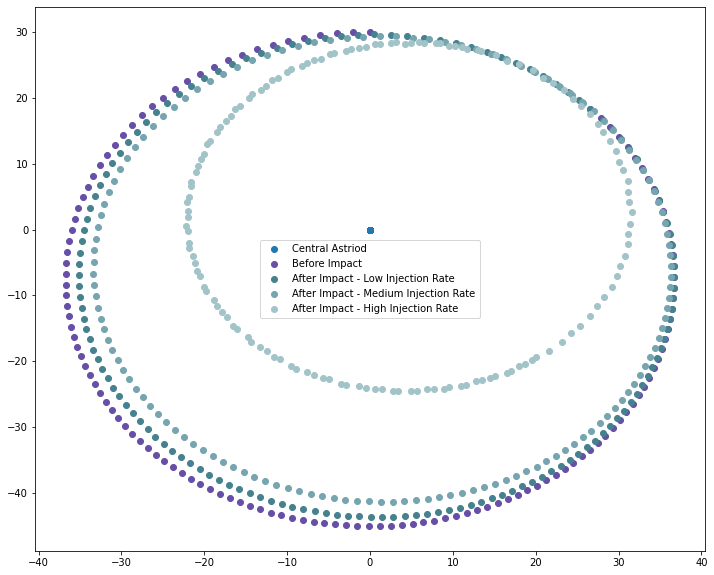

In [ ]:
#@title Parameters { run: "auto", form-width: "400px" }
plt.figure(figsize=(12,10))
InjectionRate1 = 5e-5 #@param {type:"slider", min:0, max:0.05, step:100}
InjectionRate2 = 5e-4
InjectionRate3 = 5e-3
SpinPeriod = 3.2 #@param {type:"slider", min:1, max:200, step:100}
plt.scatter(ans_original[0,1,:],ans_original[1,1,:], label="Central Astriod")
plt.scatter(ans_original[0,0,:],ans_original[1,0,:], label="Before Impact", color = '#674ea7')
inti = ans_original[:,:,-1].copy()
inti[3,0] -= 0.02 # Impact Factor
ans = solve_orbit_with_inject(inti, 130, 140., 0.01, SpinPeriod, InjectionRate1)
plt.scatter(ans[0,0,:],ans[1,0,:], label="After Impact - Low Injection Rate", color = '#45818e')
ans = solve_orbit_with_inject(inti, 130, 140., 0.01, SpinPeriod, InjectionRate2)
plt.scatter(ans[0,0,:],ans[1,0,:], label="After Impact - Medium Injection Rate", color = '#76a5af')
ans = solve_orbit_with_inject(inti, 130, 140., 0.01, SpinPeriod, InjectionRate3)
plt.scatter(ans[0,0,:],ans[1,0,:], label="After Impact - High Injection Rate", color = '#a2c4c9')
plt.legend()
plt.show()